<a href="https://colab.research.google.com/github/yuvan168/spotify-recommend/blob/main/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

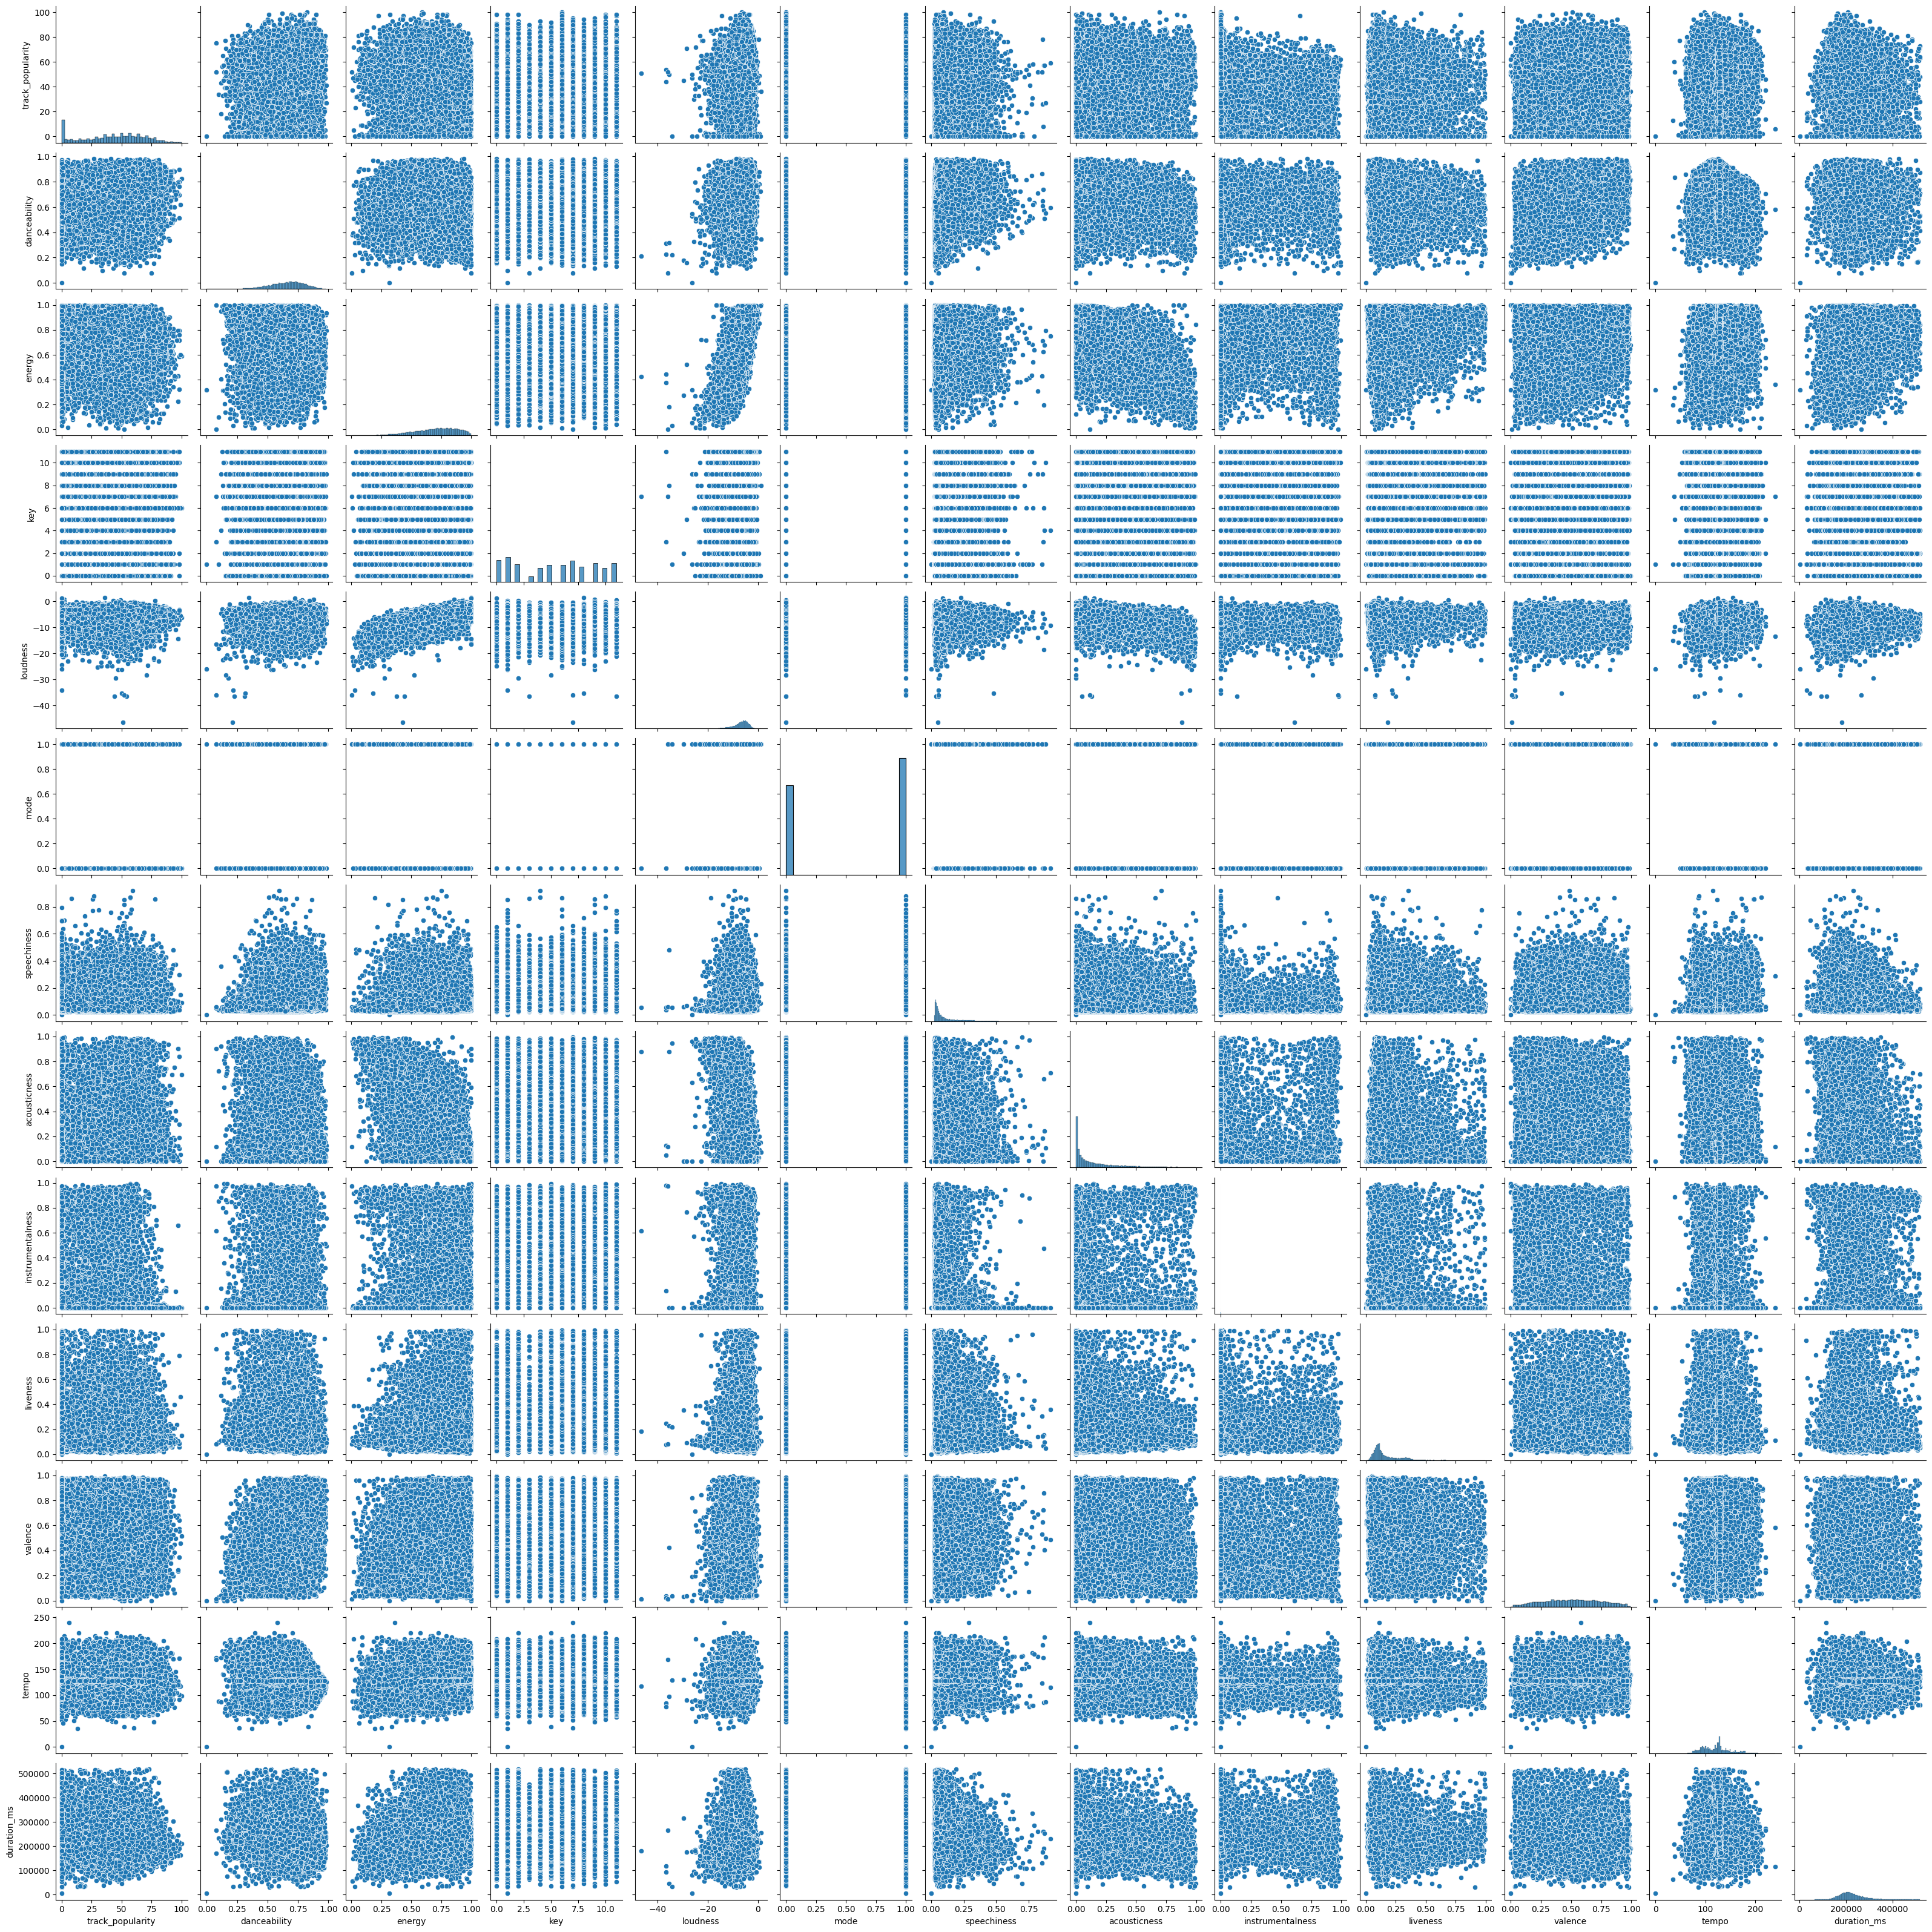

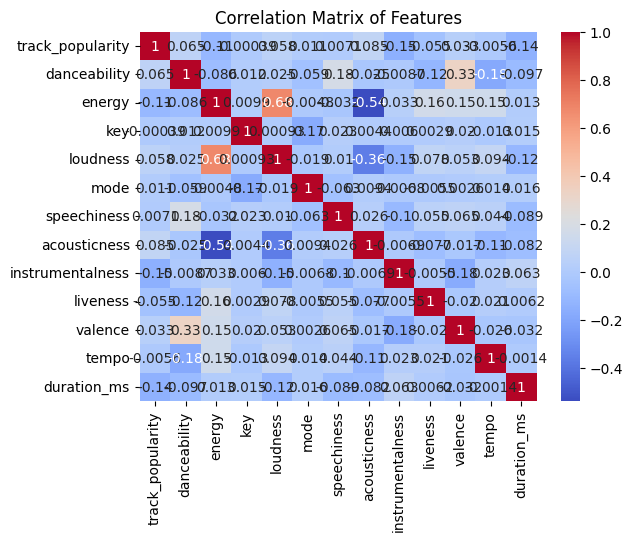

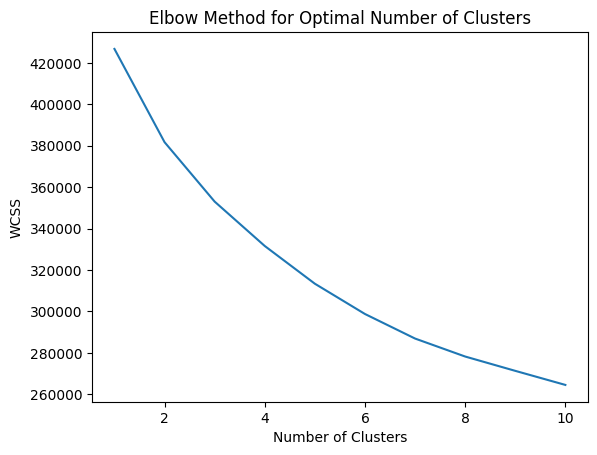

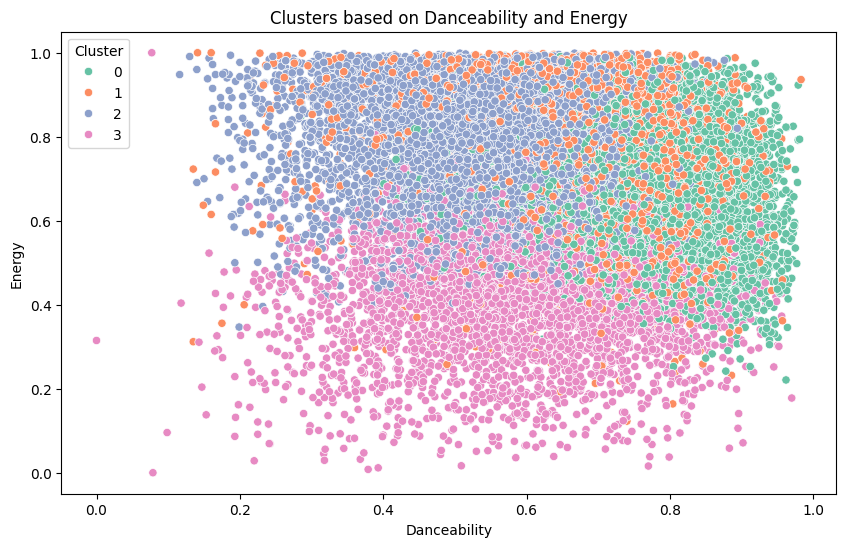

Final dataset with cluster labels:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't C

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
try:
    spotify_data = pd.read_excel("/content/spotify dataset (1) (1).csv")
except Exception as e:
    print("Error reading the Excel file:", e)
    spotify_data = pd.DataFrame()  # Initialize an empty DataFrame if reading fails

# If the above method fails, try with other methods
# Method 2: Reading with different engine
if spotify_data.empty:
    try:
        spotify_data = pd.read_excel("/content/spotify dataset (1) (1).csv", engine='openpyxl')
    except Exception as e:
        print("Error reading the Excel file with openpyxl engine:", e)
        spotify_data = pd.DataFrame()  # Initialize an empty DataFrame if reading fails

# Handle missing values if any
if not spotify_data.empty:
    spotify_data.dropna(inplace=True)

# Data pre-processing
# Drop non-numeric columns and fill missing values with 0
train_data_numeric = spotify_data.select_dtypes(include=['number'])
train_data_numeric.fillna(0, inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data_numeric)

# Data analysis and visualization
# Draw pairplot for visualizing relationships between features
sns.pairplot(spotify_data)
plt.show()

# Correlation matrix
corr_matrix = train_data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Clustering
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the number of clusters and fit the KMeans model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
spotify_data['Cluster'] = cluster_labels

# Plot clusters based on different parameters (e.g., danceability vs energy)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x='danceability', y='energy', hue='Cluster', palette='Set2')
plt.title('Clusters based on Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Build your model (e.g., k-nearest neighbors) for recommendation
# (This part was already included in the previous code)

# Show final result
print("Final dataset with cluster labels:")
print(spotify_data.head())
